In [211]:
import numpy as np
from scipy import stats

In [212]:
# 1

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

In [213]:
X = np.array(X)
y = np.array(y)

In [214]:
Rs = []

def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

def fisher(samples: np.ndarray, R: float) -> str:
    alpha = 0.05
    n = samples.shape[0]
    m = samples.shape[1] - 1  # поскольку добавляли фиктивный столбец

    k1 = m
    k2 = n - m - 1

    t = stats.f.ppf(1 - alpha, k1, k2)
    F = (R / k1) / ((1 - R) / k2)
    if F > t:
        print(f't = {t:.4f}, F = {F:.4f}, значит, регрессия значима\n')
    else:
        print(f't = {t:.4f}, F = {F:.4f}, значит, регрессия незначима\n')

def best_feature(samples: np.ndarray) -> float:   
    n = samples.shape[0]   
    ones = np.ones((n, 1))
    T = samples.T
    
    for i,j in enumerate(T):
        X_ = T[i].reshape(-1, 1)
        Xi = np.hstack(( ones, X_ ))
        XTX = Xi.T.dot(Xi)
        XTX_inv = np.linalg.inv(XTX)
        b = XTX_inv.dot(Xi.T).dot(y)
        z = Xi.dot(b)
        e = y - z
        R = 1 - sum_of_squares(e) / sum_of_squares(y)
        Rs.append(R)
        print(f'коэф. детерминации (R) для признака {i+1} = {R:.4f}')
        fisher(Xi, R)
    print(f'по R победил {Rs.index(max(Rs))+1}-й признак')


In [215]:
best_feature(X)

коэф. детерминации (R) для признака 1 = 0.1237
t = 5.3177, F = 1.1290, значит, регрессия незначима

коэф. детерминации (R) для признака 2 = 0.1599
t = 5.3177, F = 1.5225, значит, регрессия незначима

коэф. детерминации (R) для признака 3 = 0.3395
t = 5.3177, F = 4.1114, значит, регрессия незначима

коэф. детерминации (R) для признака 4 = 0.3635
t = 5.3177, F = 4.5689, значит, регрессия незначима

по R победил 4-й признак


In [216]:
# 2
import pandas as pd

traff_A = 2509
sell_A = 77

traff_B = 1465
sell_B = 60

In [217]:
conv_A = sell_A / traff_A
conv_B = sell_B / traff_B

print(f'конверсия со страницы A ={conv_A:.4f}\nконверсия со страницы B ={conv_B:.4f}')

конверсия со страницы A =0.0307
конверсия со страницы B =0.0410


In [225]:
# Начну создавать датасет с посещением страаниц - не знал как к этому подступиться, поэтому все так криво
A_tr = traff_A - sell_A
B_tr = traff_B - sell_B

In [226]:
Page_name_A_not_conv = ['A'] * A_tr
Page_name_A_conv = ['A'] * sell_A
Converted_A_0 = [0] * A_tr
Converted_A_1 = [1] * sell_A

Page_name_B_not_conv = ['B'] * B_tr
Page_name_B_conv = ['B'] * sell_B
Converted_B_0 = [0] * B_tr
Converted_B_1 = [1] * sell_B

In [229]:
A_0 = [Page_name_A_not_conv, Converted_A_0]
A_1 = [Page_name_A_conv , Converted_A_1]

B_0 = [Page_name_B_not_conv, Converted_B_0]
B_1 = [Page_name_B_conv, Converted_B_1]

In [231]:
A_0 = np.array(A_0)
A_1 = np.array(A_1)
B_0 = np.array(B_0)
B_1 = np.array(B_1)

In [237]:
A = np.column_stack((A_0, A_1))
B = np.column_stack((B_0, B_1))

In [243]:
# Датасет готов
df = pd.DataFrame(np.column_stack((A, B)).T, columns=['Page_name', 'Converted']).reset_index()
df

,index,Page_name,Converted
0,0,A,0
1,1,A,0
2,2,A,0
3,3,A,0
4,4,A,0
...,...,...,...
3969,3969,B,1
3970,3970,B,1
3971,3971,B,1
3972,3972,B,1


In [261]:
n1 = int( df.loc[df['Page_name'] == 'A']['Page_name'].value_counts() )
n2 = int( df.loc[df['Page_name'] == 'B']['Page_name'].value_counts() )
n1, n2

(2509, 1465)

Но = конверсии страниц A и B не отличаются, 
H1 = конверсии страниц A и B отличаются

Найдем выборочные средние

In [293]:

y_1 = df.loc[df['Page_name'] == 'A']['Converted'].astype(float)
y_2 = df.loc[df['Page_name'] == 'B']['Converted'].astype(float)
y1_mean = y_1.mean()
y2_mean = y_2.mean()
y1_mean, y2_mean

(0.03068951773614986, 0.040955631399317405)

In [306]:
y1 = np.array(y_1)
y2 = np.array(y_2)

Общее среднее значение

In [294]:
y = df[df.columns[2]].astype(float)
y_mean = y.mean()
y_mean

0.03447408152994464

Найдём значения $SS_b$ и $SS_w$ и оценки диспресий:

In [307]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035742)

In [308]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.033277837172798946)

Значение F статистики:

In [309]:
F = sigma2_b / sigma2_w
F

2.92932438890135

Найдем квантиль при уровне значимость alpha = 0.05

In [310]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Итак, наше значение F статистики не попадает в критичнскую область. Значит, отличие конверсии между страницами A и B не является значимым

In [311]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

(0, 0.5)

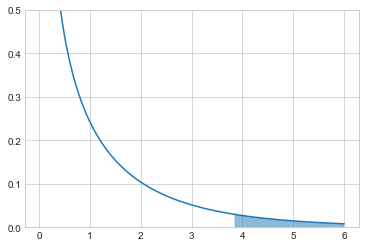

In [317]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.ylim(0, 0.5)